In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# 加载数据集
iris = load_iris()
# 将数据集转换为Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# 添加类别列
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 查看数据集的前几行
iris_df.head()

# 如何查看后面几行？
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [2]:
iris_df.shape

(150, 5)

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


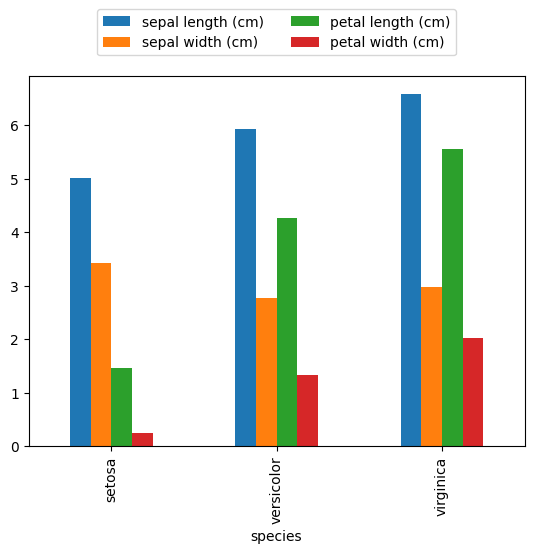

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

grouped_data=iris_df.groupby("species")
#用不同的花的类别分成不同的组，此数据为三组
group_mean=grouped_data.mean()
#求组平均值
group_mean.plot(kind="bar")
plt.legend(loc="upper center",bbox_to_anchor=(0.5,1.2),ncol=2)
plt.show()
#画图

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 加载 iris 数据集
iris = load_iris()
data = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['species']
)

# 将目标列转为分类变量
data['species'] = data['species'].apply(lambda x: iris['target_names'][int(x)])

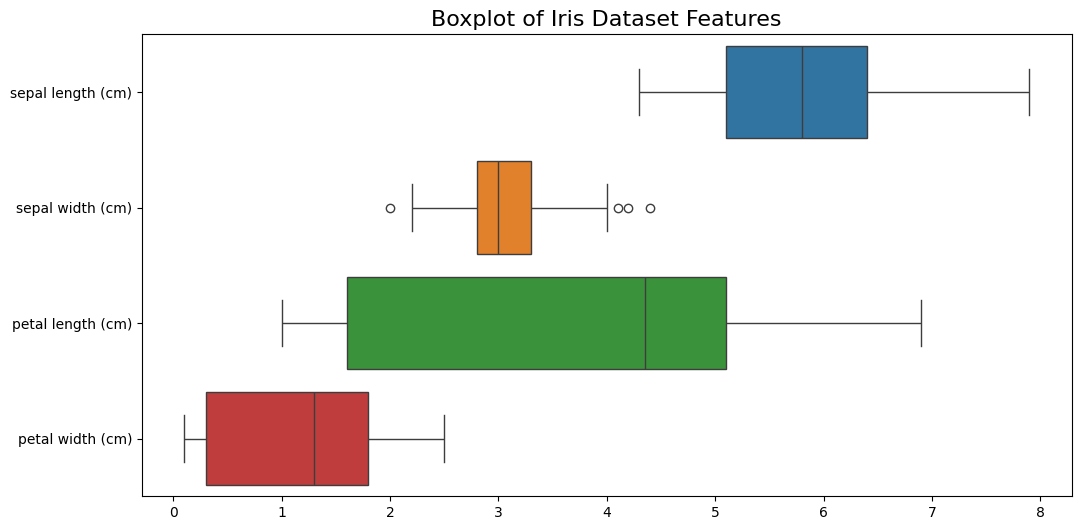

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h")
plt.title("Boxplot of Iris Dataset Features", fontsize=16)
plt.show()

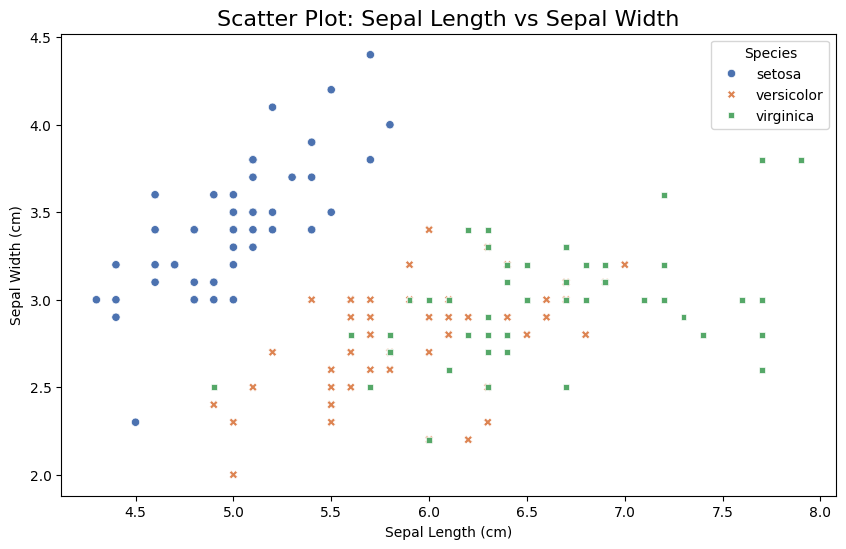

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data["sepal length (cm)"],
    y=data["sepal width (cm)"],
    hue=data["species"],
    style=data["species"],
    palette="deep"
)
plt.title("Scatter Plot: Sepal Length vs Sepal Width", fontsize=16)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.show()

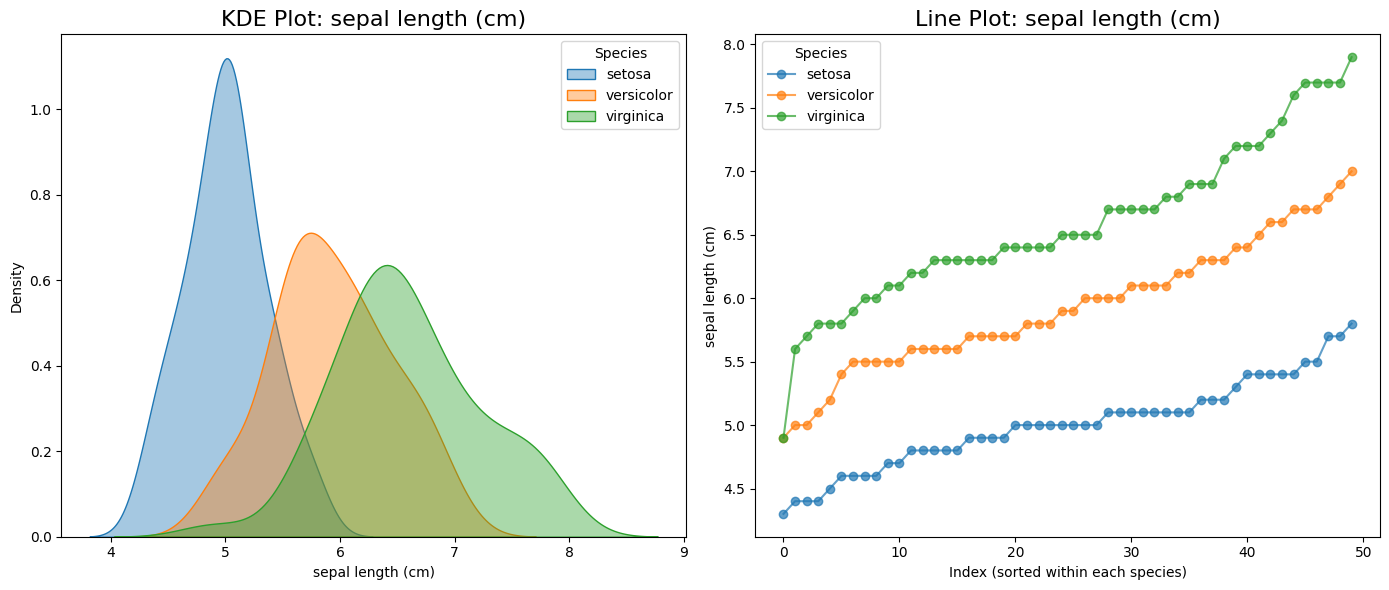

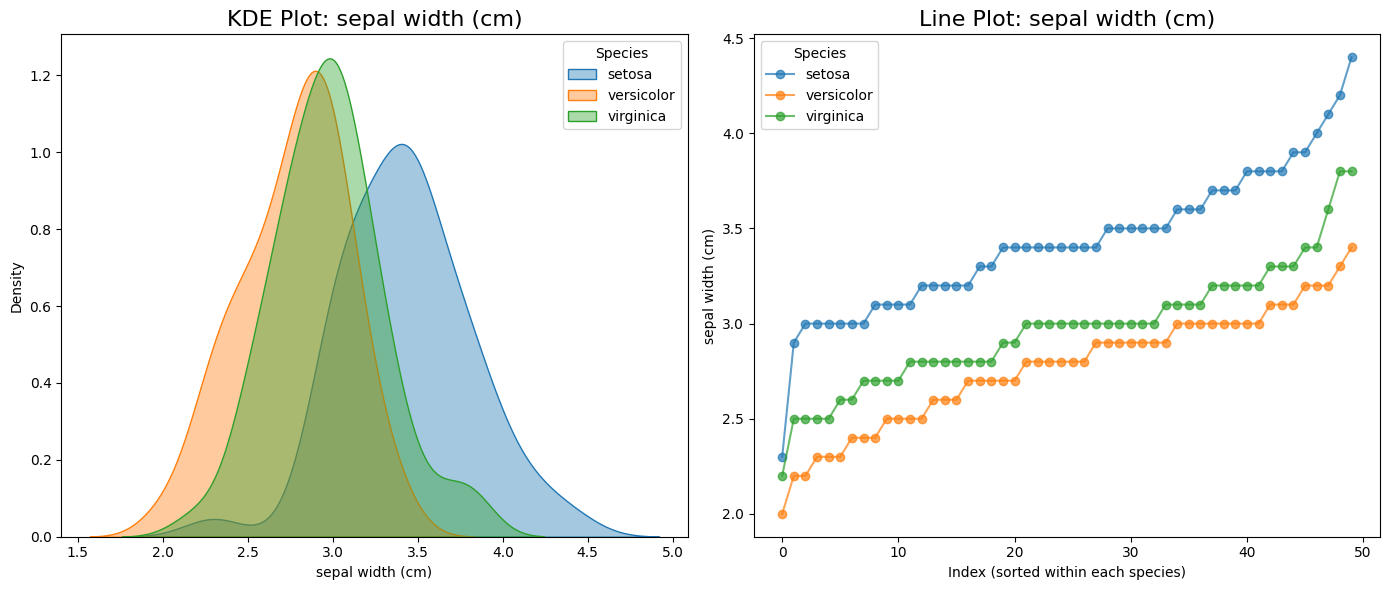

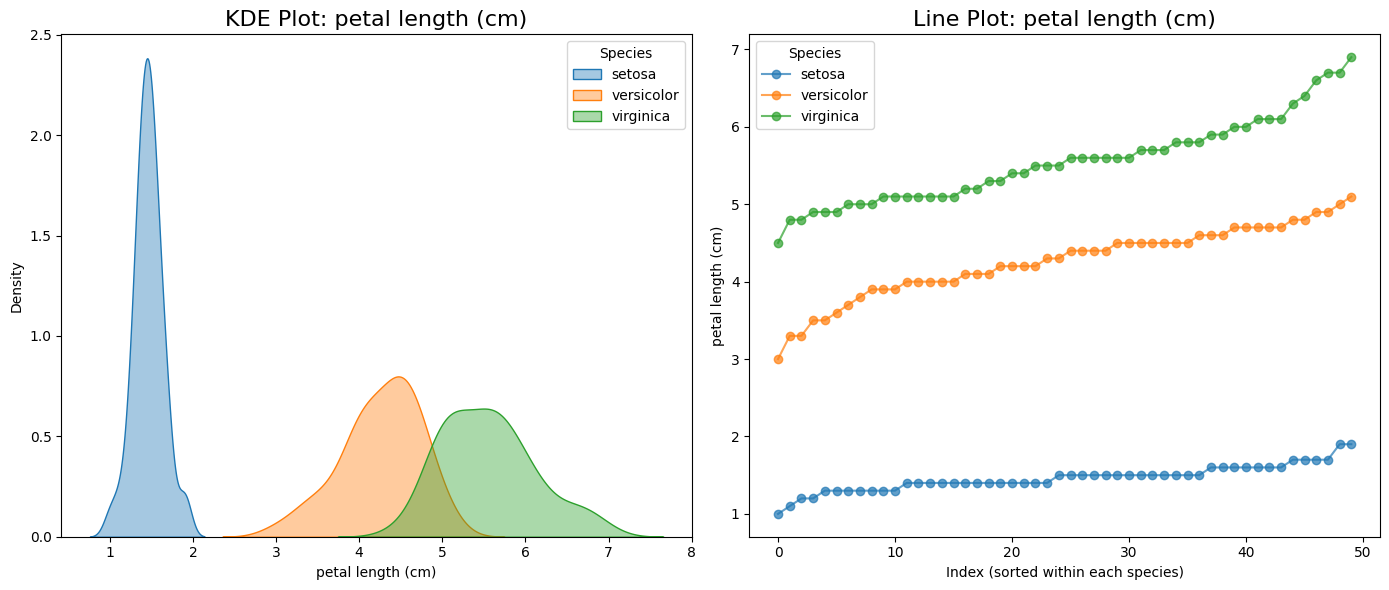

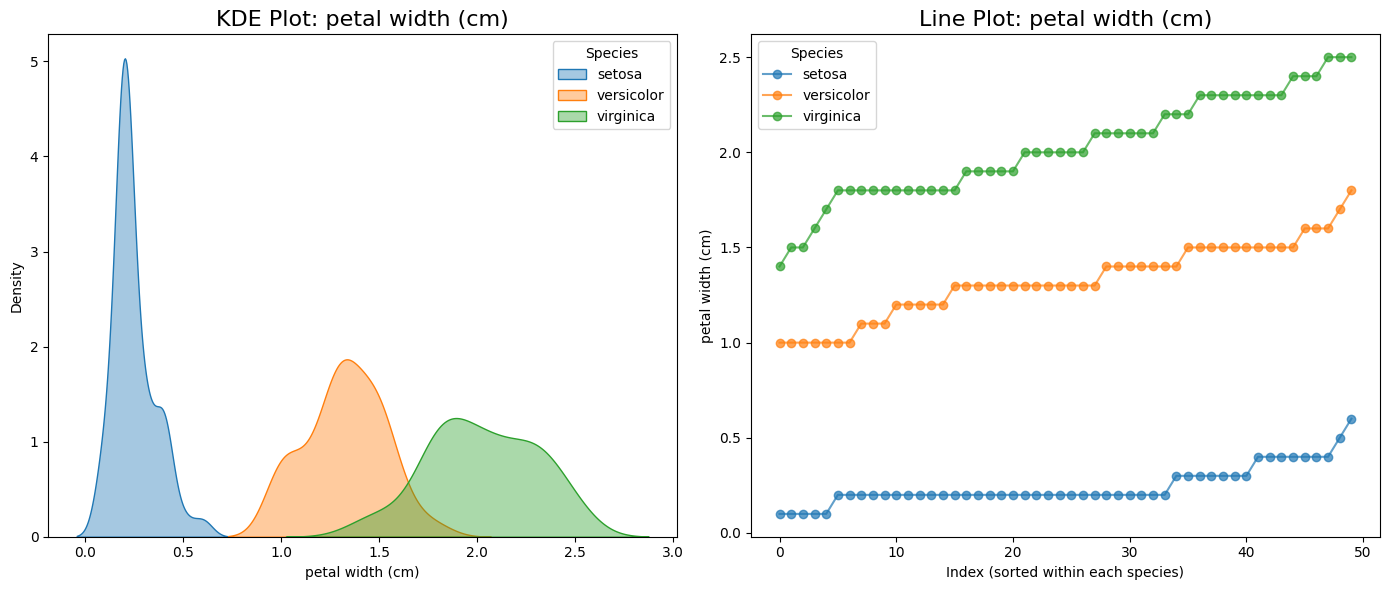

In [9]:
def plot_kde_and_line(data, feature_name):
    plt.figure(figsize=(14, 6))
    
    # KDE 图
    plt.subplot(1, 2, 1)
    for species in iris['target_names']:
        sns.kdeplot(
            data=data[data['species'] == species][feature_name],
            label=species,
            fill=True,
            alpha=0.4
        )
    plt.title(f"KDE Plot: {feature_name}", fontsize=16)
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.legend(title="Species")

    plt.subplot(1, 2, 2)
    for species in iris['target_names']:
        species_data = data[data['species'] == species][feature_name].sort_values().reset_index(drop=True)
        plt.plot(species_data, label=species, marker='o', linestyle='-', alpha=0.7)
    plt.title(f"Line Plot: {feature_name}", fontsize=16)
    plt.xlabel("Index (sorted within each species)")
    plt.ylabel(feature_name)
    plt.legend(title="Species")
    
    plt.tight_layout()
    plt.show()

for feature in iris['feature_names']:
    plot_kde_and_line(data, feature)

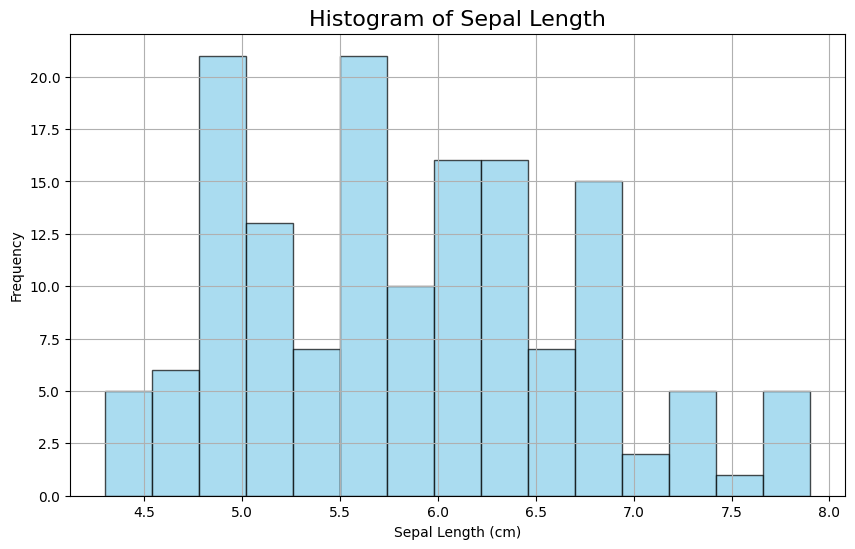

In [10]:
plt.figure(figsize=(10, 6))
data['sepal length (cm)'].hist(bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Histogram of Sepal Length", fontsize=16)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

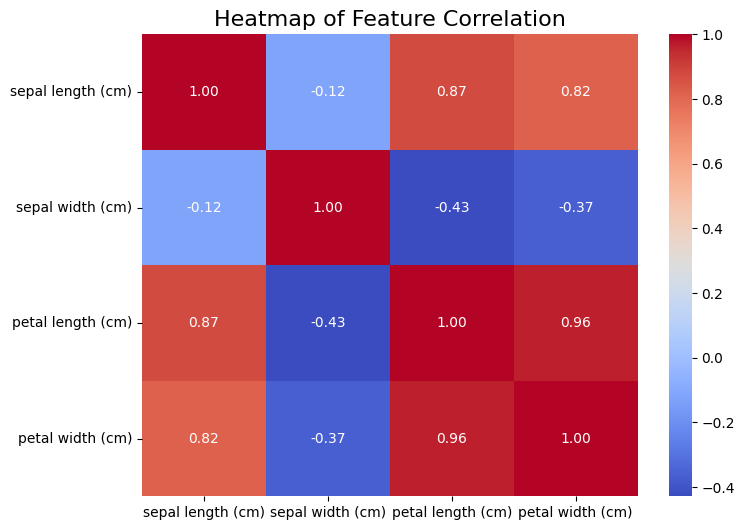

In [11]:
correlation_matrix = data.iloc[:, :-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlation", fontsize=16)
plt.show()
